In [18]:
import math
from mxnet import nd
import d2lzh as d2l

# AdaGrad
---
- 目的是，根据自变量 在每个维度的梯度值的大小<br/>
  来调整各个维度上的学习率
- 避免统一的学习率难以适应所有维度的问题 <br/>
  本质是赋予梯度一个加速度而已。

In [20]:
def adagrad_2d(x1,x2,s1,s2):
    g1,g2,eps = 0.2*x1 , 4*x2 , 1e-6 # 前两项为自变量梯度
    s1 += g1**2
    s2 += g2**2
    
    x1 -= eta/math.sqrt(s1 + eps)*g1
    x2 -= eta/math.sqrt(s2 + eps)*g2
    return x1,x2,s1,s2

def adagrad_2d(x1,x2,s1,s2)

In [21]:
def f_2d(x1,x2): # 这是目标函数啦！自己定义的！为了观察AdaGrad算法对自变量的迭代轨迹
    return 0.1*x1**2 + 2*x2**2

epoch 20, x1 -2.382563, x2 -0.158591


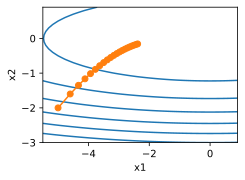

In [22]:
eta = 0.4
d2l.show_trace_2d(f_2d,d2l.train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


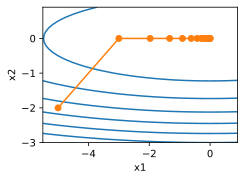

In [23]:
eta = 2
d2l.show_trace_2d(f_2d,d2l.train_2d(adagrad_2d))

In [24]:
data = np.genfromtxt('D:/plantainz/OuO_DeepLearning/DataSet/airfoil_self_noise.dat',delimiter='\t')
data = (data - data.mean(axis = 0)) / data.std(axis = 0)
features,labels = nd.array(data[:1500,:-1]),nd.array(data[:1500,-1])

In [25]:
def init_adagrad_states():
    s_w = nd.zeros((features.shape[1],1))
    s_b = nd.zeros(1)
    return(s_w,s_b)

In [26]:
def adagrad(params,states,hyperparams):
    eps = 1e-6
    for p,s in zip(params,states):
        s[:] += p.grad.square()
        p[:] -= hyperparams['lr'] * p.grad / (s + eps).sqrt()

loss: 0.243192, 0.320559 sec per epoch


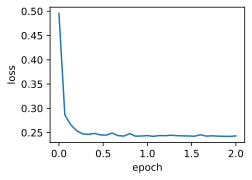

In [27]:
d2l.train_ch7(adagrad,init_adagrad_states(),{'lr':0.1},features,labels)